In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set_style("white")
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from pylab import rcParams

In [2]:
colnames = ['brands', 'model', 'chip_brands', 'chip_speed', 'chip_type', 'ram', 'hdd', 'ssd', 'card_brand', 'card_model',	'monitorSize', 'price']
# read the excel file as a dataframe
df = pd.read_excel("./data/train.xlsx", names=colnames)
# let's get some simple vision on our dataset
df.head()

,brands,model,chip_brands,chip_speed,chip_type,ram,hdd,ssd,card_brand,card_model,monitorSize,price
0,Dell,Inspiron 14R,Intel,2.4,Core i5-2430M,2.0,500,0,AMD,ATI Radeon HD 6630M / Intel HD Graphics 3000,14.1,16.299
1,Dell,Inspiron N4050,Intel,2.2,Core i3-2330M,4.0,500,0,Intel,HD Graphics 3000,14.0,13.680
2,Dell,Inspiron N4050,Intel,2.2,Core i3-2330M,4.0,500,0,Intel,HD Graphics 3000,14.0,13.680
3,Sony,Vaio SVE15125CX,Intel,2.5,Core i5-3210M,4.0,500,0,Intel,HD Graphics 4000,15.6,14.350
4,Acer,E1-431-20202G50Mnks,Intel,2.4,Pentium Dual-Intel Core 2020,2.0,500,0,Intel,HD Graphics,14.0,7.600


In [3]:
df.price = pd.to_numeric(df.price, errors = 'coerce', downcast= 'integer')
df.price = pd.to_numeric(df.price, errors = 'coerce', downcast= 'float')
df.monitorSize = pd.to_numeric(df.monitorSize, errors = 'coerce', downcast= 'integer')
df.ram = pd.to_numeric(df.ram, errors = 'coerce', downcast= 'integer')
df.hdd = pd.to_numeric(df.hdd, errors = 'coerce', downcast= 'integer')
df.ssd = pd.to_numeric(df.ssd, errors = 'coerce', downcast= 'integer')

## KNN Regression

In [4]:
data = df
X = data[['brands', 'chip_brands', 'chip_speed', 'ram', 'hdd', 'ssd', 'card_brand', 'card_model', 'monitorSize']]
Y = data.price
X = pd.get_dummies(data=X)

In [5]:
X.head()

,chip_speed,ram,hdd,ssd,monitorSize,brands_Acer,brands_Apple,brands_Asus,brands_Dell,brands_HP,...,card_model_Radeon HD8750M,card_model_Radeon HD8850M,card_model_Radeon R5 M230 2GB,card_model_Radeon R7 M265,card_model_Radion HD 7650M,card_model_Raedon HD 8670M,card_model_Raedon HD R7 M265,card_model_Randeon HD 7450M,card_model_Readon 7670M 1GB,card_model_Thames XT-M2
0,2.4,2.0,500,0,14.1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2.2,4.0,500,0,14.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2.2,4.0,500,0,14.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2.5,4.0,500,0,15.6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.4,2.0,500,0,14.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 42)

/home/anhbn/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


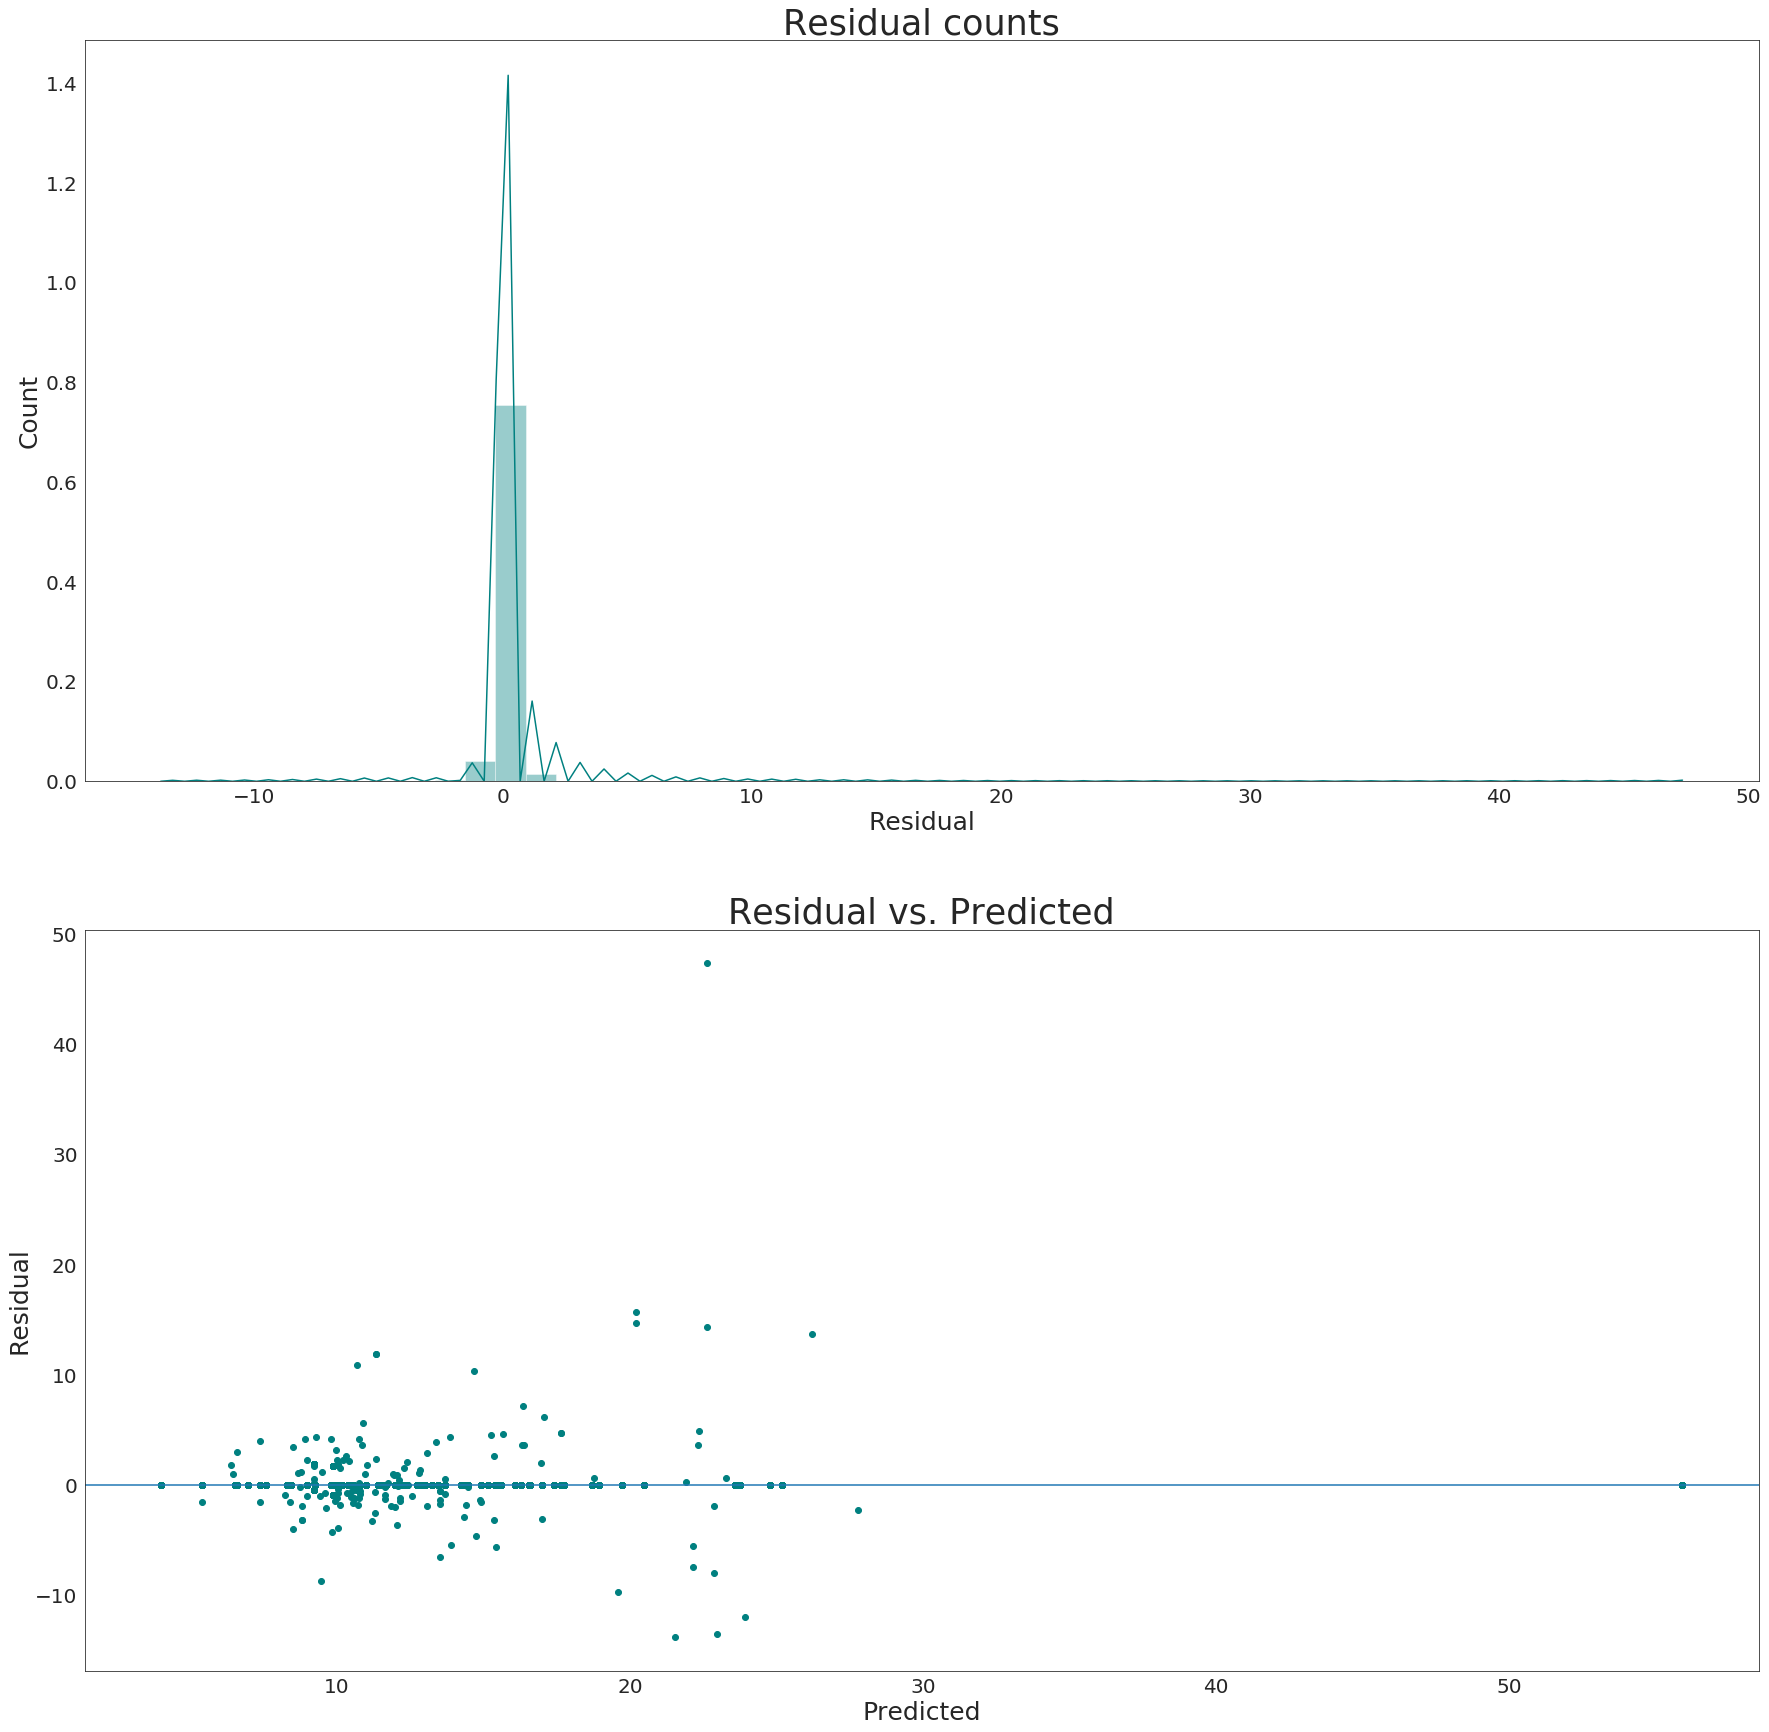

RMSE:
0.94596475


In [7]:
from sklearn import neighbors
# the value of n_neighbors will be changed when we plot the histogram showing the lowest RMSE value
knn = neighbors.KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train, Y_train)

predicted = knn.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, predicted))
print('RMSE:')
print(rmse)

In [8]:
from sklearn.metrics import r2_score
print('Variance score: %.2f' % r2_score(Y_test, predicted))

Variance score: 0.99


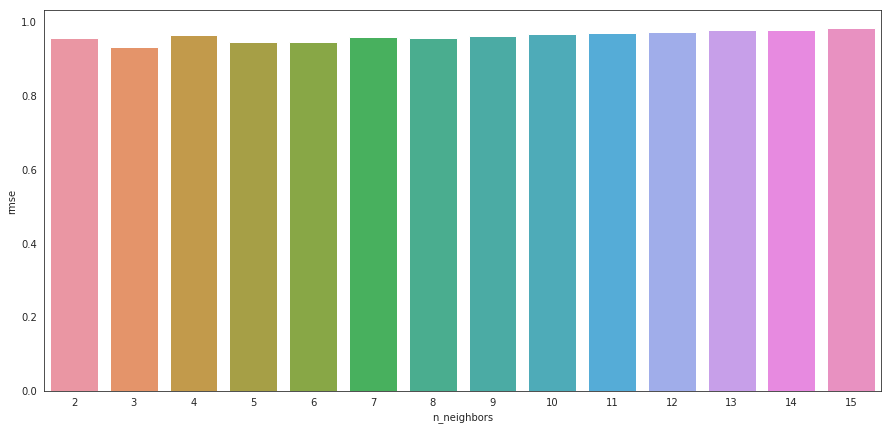

In [9]:
rmse_l = []
num = []
for n in range(2, 16):
    knn = neighbors.KNeighborsRegressor(n_neighbors=n)
    knn.fit(X_train, Y_train)
    predicted = knn.predict(X_test)
    rmse_l.append(np.sqrt(mean_squared_error(Y_test, predicted)))
    num.append(n)
    
df_plt = pd.DataFrame()
df_plt['rmse'] = rmse_l
df_plt['n_neighbors'] = num
ax = plt.figure(figsize=(15,7))
sns.barplot(data = df_plt, x = 'n_neighbors', y = 'rmse')
plt.show()

## Descision Tree Regression

/home/anhbn/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


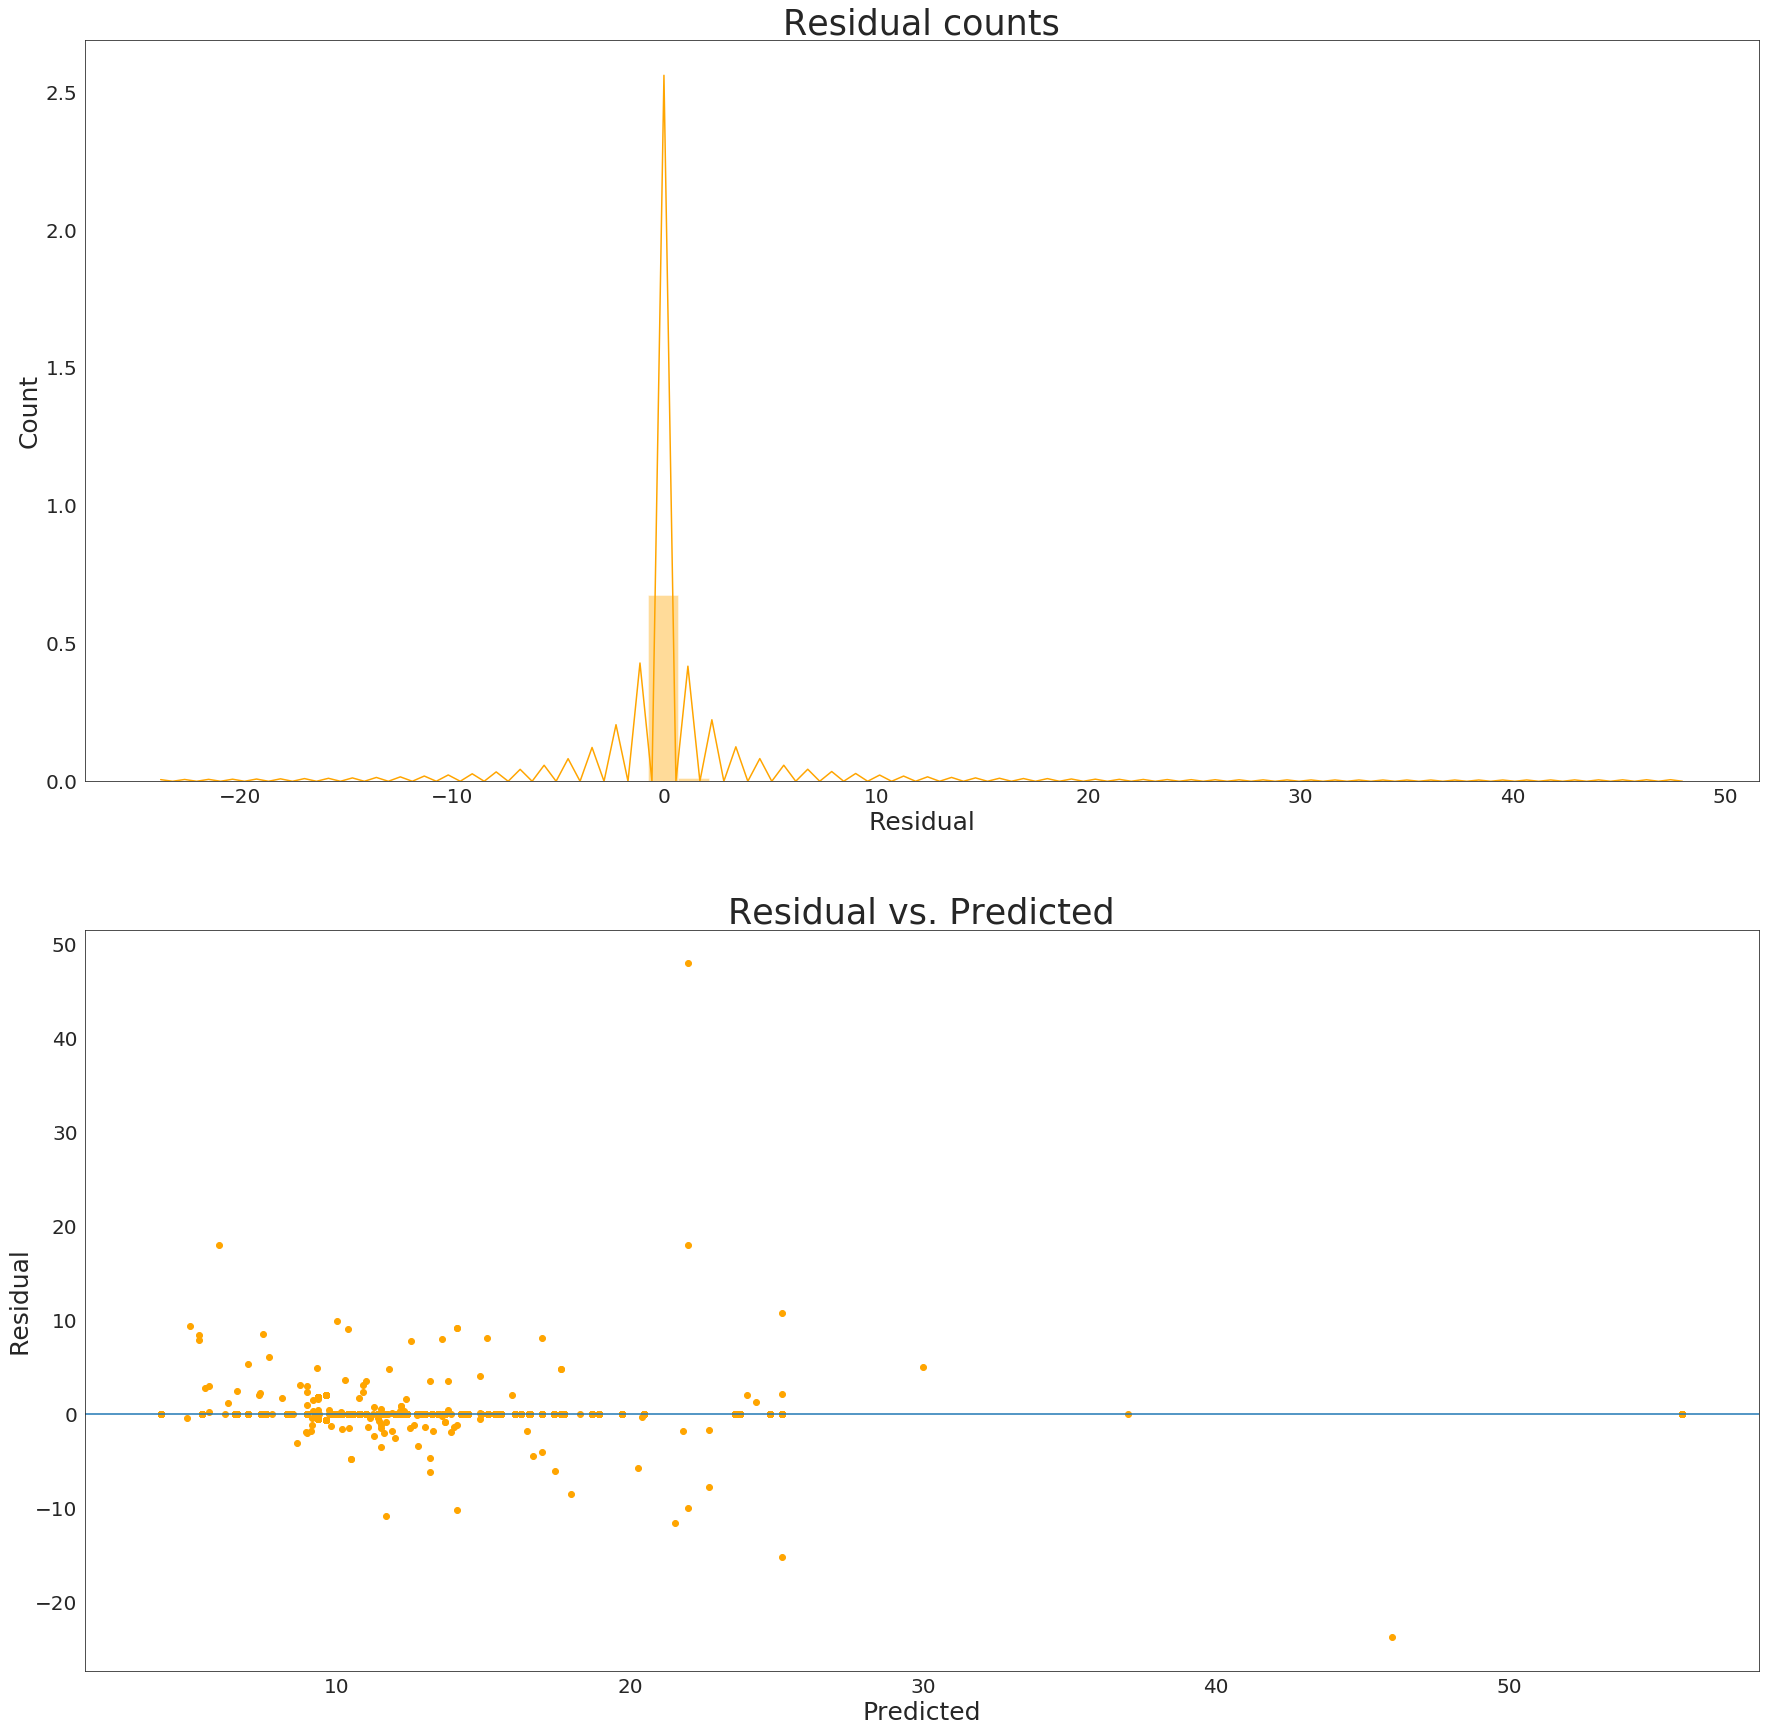

RMSE:
1.0021746302564416


In [10]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_features='auto')
dtr.fit(X_train, Y_train)
predicted = dtr.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='orange')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='orange')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, predicted))
print('RMSE:')
print(rmse)

In [11]:
print('Variance score: %.2f' % r2_score(Y_test, predicted))

Variance score: 0.98


## Linear Regression

/home/anhbn/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


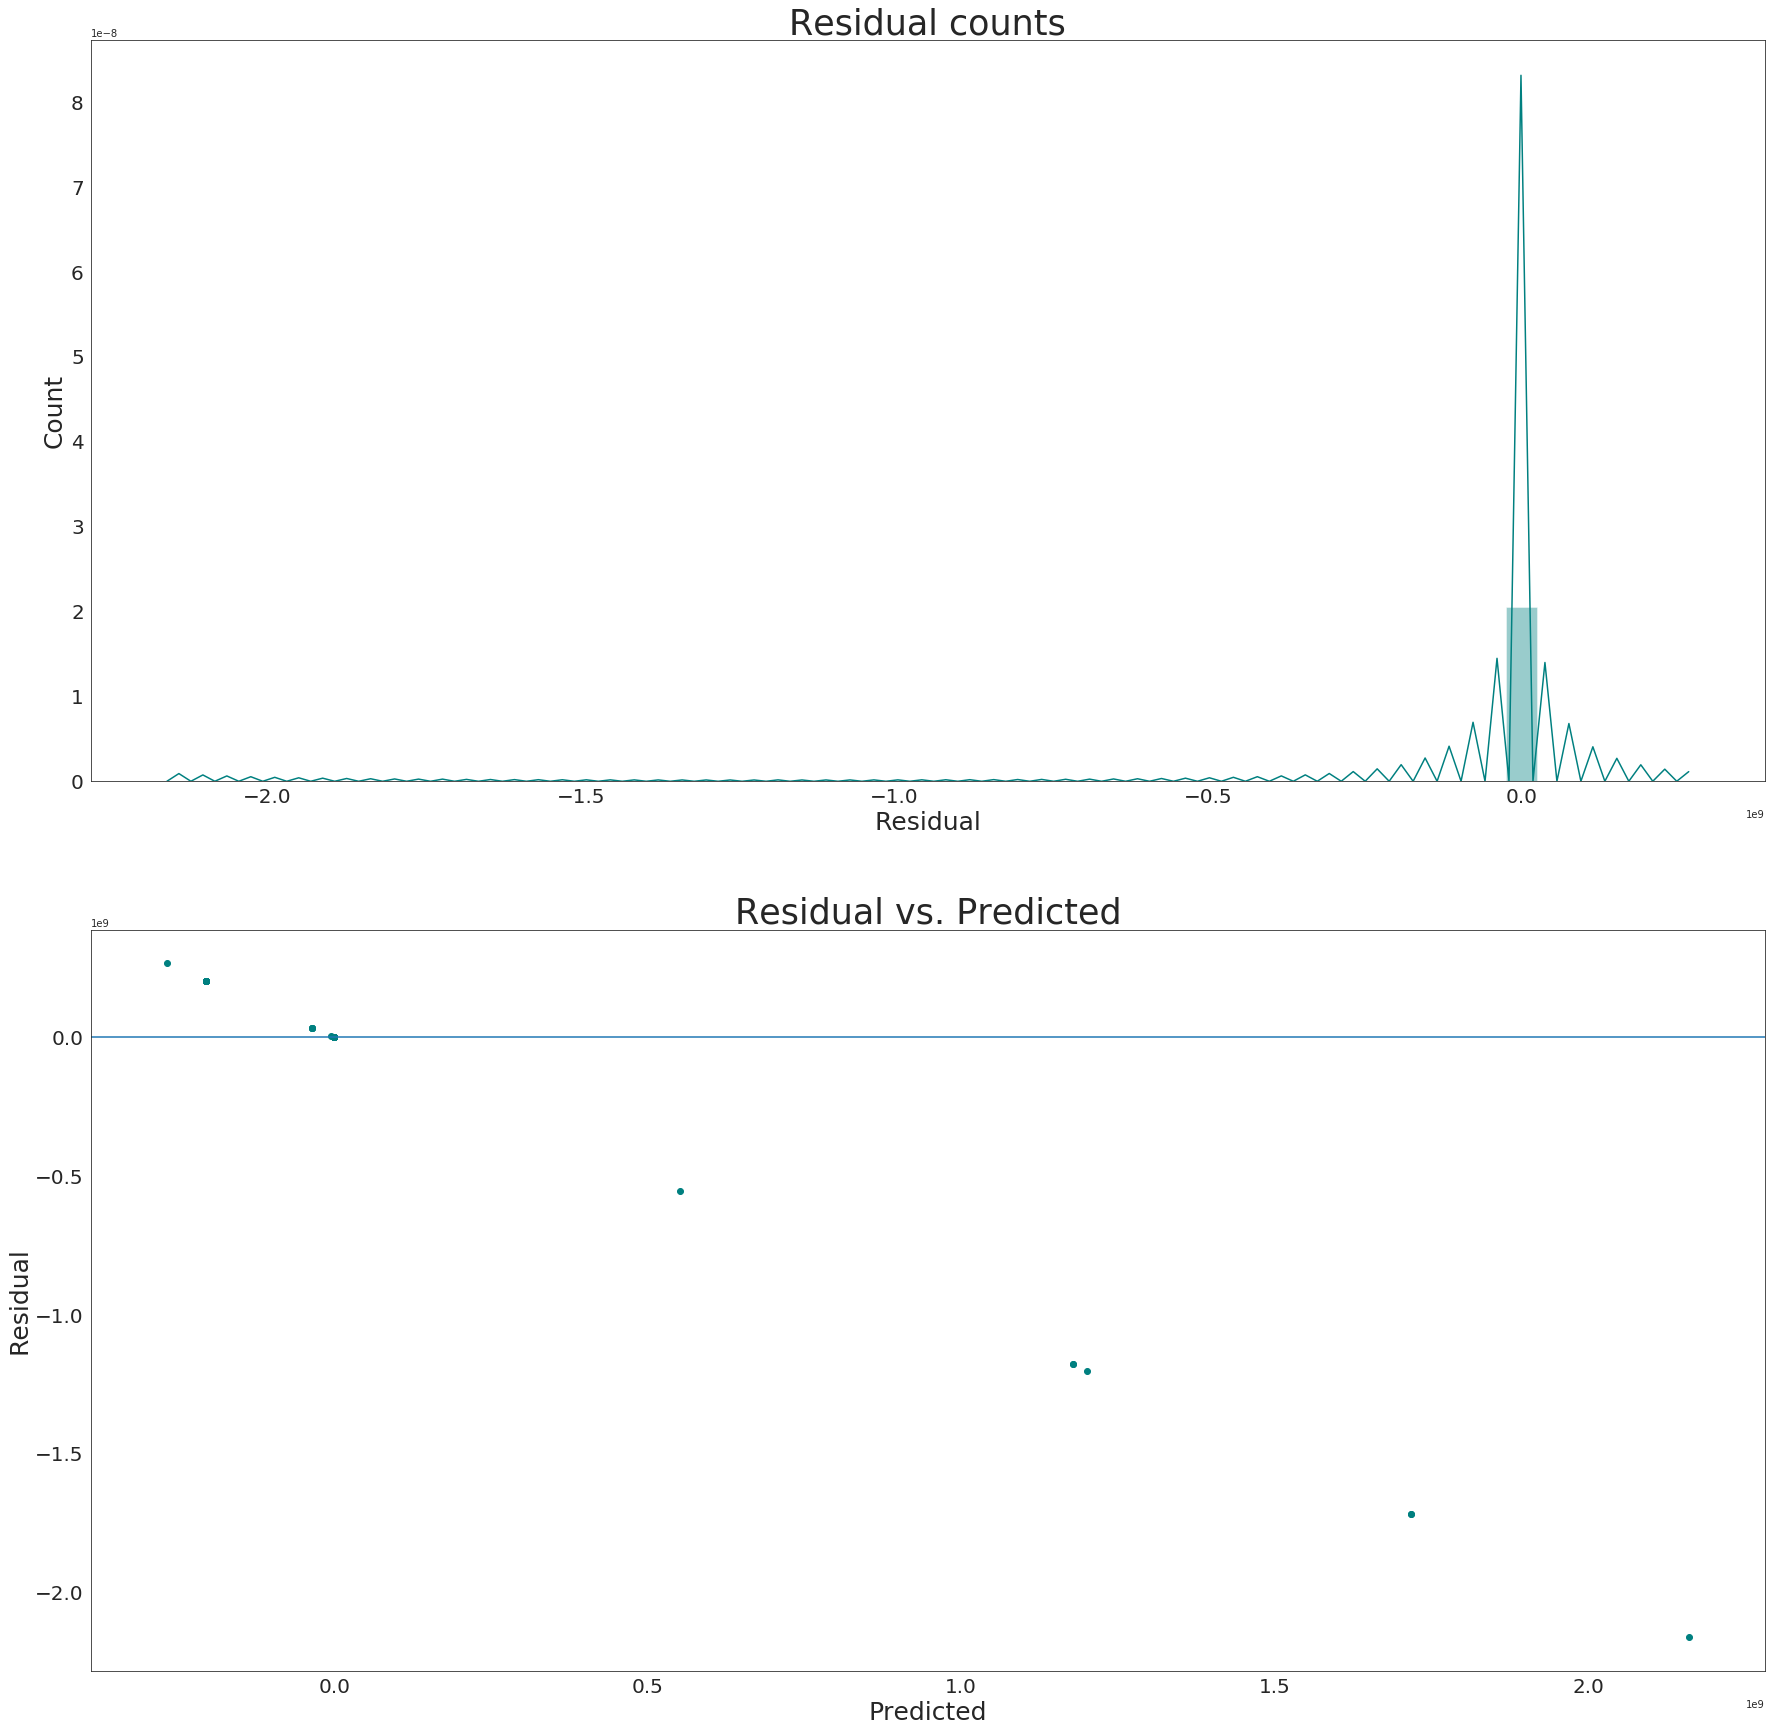

RMSE:
49234891.83851943


In [12]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

predicted = regr.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, predicted))
print('RMSE:')
print(rmse)

In [13]:
print('Variance score: %.2f' % r2_score(Y_test, predicted))

Variance score: -38969618912339.08


## Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

r_sq = []
deep = []
mean_scores = []

for n in range(3, 11):
    gbr = GradientBoostingRegressor(loss ='ls', max_depth=n)
    gbr.fit (X, Y)
    deep.append(n)
    r_sq.append(gbr.score(X, Y))
    mean_scores.append(cross_val_score(gbr, X, Y, cv=12).mean())
    
plt_gbr = pd.DataFrame()

plt_gbr['mean_scores'] = mean_scores
plt_gbr['depth'] = deep
plt_gbr['R²'] = r_sq

f, ax = plt.subplots(figsize=(15, 5))
sns.barplot(data = plt_gbr, x='depth', y='R²')
plt.show()

f, ax = plt.subplots(figsize=(15, 5))
sns.barplot(data = plt_gbr, x='depth', y='mean_scores')
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

gbr = GradientBoostingRegressor(loss ='ls', max_depth=6)
gbr.fit (X_train, Y_train)
predicted = gbr.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

rmse = np.sqrt(mean_squared_error(Y_test, predicted))
scores = cross_val_score(gbr, X, Y, cv=12)

print('\nCross Validation Scores:')
print(scores)
print('\nMean Score:')
print(scores.mean())
print('\nRMSE:')
print(rmse)

In [ ]:
print('Variance score: %.2f' % r2_score(Y_test, predicted))

In [ ]:
A = Y_test.values.reshape(-1, 1)
B = predicted.reshape(-1, 1)

In [ ]:
plt.rcParams['figure.figsize'] = 16,5
plt.figure()
plt.plot(A[-100:], label="Real")
plt.plot(B[-100:], label="Predicted")
plt.legend()
plt.title("Price: real vs predicted")
plt.ylabel("price [DH]")
plt.xticks(())
plt.show()

In [ ]:
from sklearn.externals import joblib

joblib.dump(gbr, 'model.pkl')

In [ ]:
user_input = {'brands':'Dell','chip_brands':'Intel','chip_speed':'2.26', 
              'ram':2,'hdd':320,'ssd':0,'card_brand':'Intel', 'card_model':'HD Graphics','monitorSize':14}
def input_to_one_hot(data):
    # initialize the target vector with zero values
    enc_input = np.zeros(236)
    # set the numerical input as they are
    enc_input[0] = data['chip_speed']
    enc_input[1] = data['ram']
    enc_input[2] = data['hdd']
    enc_input[3] = data['ssd']
    enc_input[4] = data['monitorSize']
    ##################### Mark #########################
    # get the array of marks categories
    brands = df.brands.unique()
    # redefine the the user inout to match the column name
    redefinded_user_input = 'brands_'+data['brands']
    # search for the index in columns name list 
    brands_column_index = X.columns.tolist().index(redefinded_user_input)
    #print(mark_column_index)
    # fullfill the found index with 1
    enc_input[brands_column_index] = 1
    ##################### Fuel Type ####################
    # get the array of fuel type
    chip_brands = df.chip_brands.unique()
    # redefine the the user inout to match the column name
    redefinded_user_input = 'chip_brands_'+data['chip_brands']
    # search for the index in columns name list 
    chip_brands_column_index = X.columns.tolist().index(redefinded_user_input)
    # fullfill the found index with 1
    enc_input[chip_brands_column_index] = 1
    ##################### Fuel Type ####################
    # get the array of fuel type
    card_brand = df.card_brand.unique()
    # redefine the the user inout to match the column name
    redefinded_user_input = 'card_brand_'+data['card_brand']
    # search for the index in columns name list 
    card_brand_column_index = X.columns.tolist().index(redefinded_user_input)
    # fullfill the found index with 1
    enc_input[card_brand_column_index] = 1
    ##################### Fuel Type ####################
    # get the array of fuel type
    card_model = df.card_model.unique()
    # redefine the the user inout to match the column name
    redefinded_user_input = 'card_model_'+data['card_model']
    # search for the index in columns name list 
    card_model_column_index = X.columns.tolist().index(redefinded_user_input)
    # fullfill the found index with 1
    enc_input[card_model_column_index] = 1
    return enc_input

In [ ]:
print(input_to_one_hot(user_input))

In [ ]:
input_encode = input_to_one_hot(user_input)

In [ ]:
price_pred = gbr.predict([input_encode])

In [ ]:
price_pred[0]